In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('release_networks_homework_data/Cooffending/Cooffending.csv')
print(df.shape)
df.head()

(1280459, 13)


,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear
0,1,F,1085034,3530.0,NaN,NaN,NaN,58227,2.0,0,1,12/17/2005,2005
1,2,F,1431379,1430.0,NaN,NaN,NaN,94068,5.0,0,1,04/23/2008,2008
2,4,M,167174,1430.0,21702.0,NaN,NaN,49058,2.0,0,1,03/06/2008,2008
3,5,M,1179096,1420.0,NaN,NaN,NaN,65005,71.0,0,1,08/21/2008,2008
4,17,M,1270690,1625.0,NaN,NaN,NaN,23027,NaN,0,3,04/30/2003,2003


In [3]:
df['NumberofOffenders'] = df.NumberAdultOffenders + df.NumberYouthOffenders
df.head()

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear,NumberofOffenders
0,1,F,1085034,3530.0,NaN,NaN,NaN,58227,2.0,0,1,12/17/2005,2005,1
1,2,F,1431379,1430.0,NaN,NaN,NaN,94068,5.0,0,1,04/23/2008,2008,1
2,4,M,167174,1430.0,21702.0,NaN,NaN,49058,2.0,0,1,03/06/2008,2008,1
3,5,M,1179096,1420.0,NaN,NaN,NaN,65005,71.0,0,1,08/21/2008,2008,1
4,17,M,1270690,1625.0,NaN,NaN,NaN,23027,NaN,0,3,04/30/2003,2003,3


In [6]:
df.drop_duplicates(subset=['OffenderIdentifier', 'CrimeIdentifier'], inplace=True)
print(df.shape)

(1279987, 14)


In [7]:
df.head()

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear,NumberofOffenders
0,1,F,1085034,3530.0,NaN,NaN,NaN,58227,2.0,0,1,12/17/2005,2005,1
1,2,F,1431379,1430.0,NaN,NaN,NaN,94068,5.0,0,1,04/23/2008,2008,1
2,4,M,167174,1430.0,21702.0,NaN,NaN,49058,2.0,0,1,03/06/2008,2008,1
3,5,M,1179096,1420.0,NaN,NaN,NaN,65005,71.0,0,1,08/21/2008,2008,1
4,17,M,1270690,1625.0,NaN,NaN,NaN,23027,NaN,0,3,04/30/2003,2003,3


In [8]:
len(set(df['OffenderIdentifier']))

539593

In [13]:
df['OffenderIdentifier'].unique().shape

(539593,)

In [14]:
df['CrimeIdentifier'].unique().shape

(1164836,)

In [17]:
for i in range(2003,2011):
    print(df[df['CrimeYear']==i]['CrimeIdentifier'].unique().shape[0],' in year %d'%i)

110556  in year 2003
121374  in year 2004
172664  in year 2005
185840  in year 2006
196151  in year 2007
199288  in year 2008
178959  in year 2009
4  in year 2010


In [16]:
df.dtypes

OffenderIdentifier        int64
OffenderGender           object
CrimeIdentifier           int64
CrimeType1              float64
CrimeType2              float64
CrimeType3              float64
CrimeType4              float64
Municipality              int64
CrimeLocation           float64
NumberYouthOffenders      int64
NumberAdultOffenders      int64
CrimeDate                object
CrimeYear                 int64
NumberofOffenders         int64
dtype: object

In [18]:
df[df['NumberofOffenders']==df['NumberofOffenders'].max()]

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear,NumberofOffenders
43313,47053,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
48202,51795,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
52676,56003,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
55304,58110,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
58993,61468,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775354,450815,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
795913,460918,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
855836,489127,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156
982842,541404,M,27849,39999.0,NaN,NaN,NaN,66023,9.0,0,156,04/20/2009,2009,156


In [24]:
df.groupby('OffenderIdentifier')['CrimeIdentifier'].count()[df.groupby('OffenderIdentifier')['CrimeIdentifier'].count()==456]

OffenderIdentifier
300728    456
Name: CrimeIdentifier, dtype: int64

In [34]:
bp_arr = df[['OffenderIdentifier','CrimeIdentifier']].astype('str')

In [35]:
bp_arr.OffenderIdentifier = 'O_' + bp_arr.OffenderIdentifier
bp_arr.CrimeIdentifier = 'C_' + bp_arr.CrimeIdentifier
bp_arr.head()

,OffenderIdentifier,CrimeIdentifier
0,O_1,C_1085034
1,O_2,C_1431379
2,O_4,C_167174
3,O_5,C_1179096
4,O_17,C_1270690


In [36]:
bp_arr.to_numpy()

array([['O_1', 'C_1085034'],
       ['O_2', 'C_1431379'],
       ['O_4', 'C_167174'],
       ...,
       ['O_670534', 'C_187904'],
       ['O_670535', 'C_523837'],
       ['O_670536', 'C_1632652']], dtype=object)

In [39]:
from networkx.algorithms import bipartite as bp

In [47]:
B = nx.Graph()
B.add_nodes_from(bp_arr['OffenderIdentifier'], bipartite = 0)
B.add_nodes_from(bp_arr['CrimeIdentifier'], bipartite = 1)
B.add_edges_from (bp_arr.to_numpy())

In [48]:
nx.is_connected(B)

False

In [49]:
G = bp.projected_graph(B, bp_arr['OffenderIdentifier'])

In [51]:
G.number_of_nodes()

539593

In [53]:
bp_arr['OffenderIdentifier'].unique().shape

(539593,)

In [56]:
len(list(nx.isolates(G)))

418434

In [59]:
G.number_of_edges()

178413

In [64]:
g = G.copy()

In [66]:
g.remove_nodes_from(list(nx.isolates(g)))

In [70]:
np.mean(sorted([d for n, d in g.degree()], reverse=True))

2.945105192350548

In [71]:
deg = np.array(sorted([d for n, d in g.degree()], reverse=True))

In [74]:
(deg>=100).sum()

265

In [76]:
len(sorted(nx.connected_components(g), key=len, reverse=True))

36098

In [78]:
len(sorted(nx.connected_components(g), key=len, reverse=True)[0])

19924

In [85]:
A = nx.linalg.graphmatrix.adjacency_matrix(G)

In [91]:
np.sum(A==1)

356826

In [118]:
degree = []
for i in g.degree():
    degree.append(i[1])

    
degree[:10]

[2, 1, 1, 1, 1, 1, 1, 2, 2, 2]

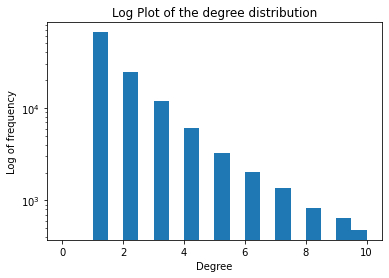

In [129]:
plt.hist( (degree), bins=20, range=(0,10))
plt.xlabel('Degree')
plt.ylabel('Log of frequency')
plt.title('Log Plot of the degree distribution')
plt.yscale('log')
plt.savefig('images/Log Plot of the degree distribution.png')
plt.show()

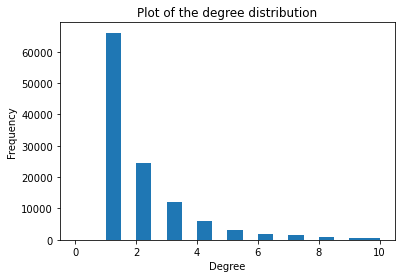

In [127]:
plt.hist( (degree), bins=20, range=(0,10))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Plot of the degree distribution')
#plt.yscale('log')
plt.savefig('images/Plot of the degree distribution.png')
plt.show()